<a href="https://colab.research.google.com/github/Nickguild1993/Natural_language_processing/blob/main/Topic_modeling_CustomerSatisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Warren,

I've used this workflow for two different projects and it's been pretty plug and play.  You'd change the data source (I connect to my gdrive but you can load in local files as well).

I find this fascinating, so if there's anything you want to go over please let me know!

Best,

Nick

Clustering open responses into topic groups using hugging face/pytorch

Pip install the below two cells (should already be installed but you never know bestie)

In [ ]:
import subprocess

def install_method(method):
  """Installs a method and provides feedback.

  Args:
    method: The name of the method to install.

  Returns:
    None
  """

  try:
    subprocess.check_call(['pip', 'install', '!pip', method])
    print(f"{method} installed successfully.")
  except subprocess.CalledProcessError:
    print(f"{method} is already installed.")

In [ ]:
# skikit-learn and ML
install_method("torch_transformers")
install_method("torch")
install_method('scikit_learn')

torch_transformers is already installed.
torch is already installed.
scikit_learn is already installed.


In [ ]:
# # tensorflow packages (only need to !pip install once, then comment out)


!pip install absl-py
!pip install tensorflow
!pip install tensorflow-hub

In [ ]:
# import the regular dependencies
import pandas as pd
import numpy as np
import re
# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# deep learning
from absl import logging
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
# Hugging face
from transformers import pipeline

# Scikit-learn
from sklearn.cluster import KMeans

# NLP
from nltk import word_tokenize
from nltk.corpus import stopwords
import nltk

In [ ]:
# Download NLTK required stuff
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Load the deep learning NLP models

In [ ]:
# universal sentence encoder (google tool)
USE_encoder = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')

In [ ]:
# function for encoder
def embed(input):
  return np.array(USE_encoder(input))

In [ ]:
# testing embed

embedding = embed(['Periwinkle is the cutest cat on this earth'])
print(embedding.shape)
embedding

(1, 512)


array([[ 0.00391846,  0.01274279,  0.02623516,  0.00370415, -0.03189528,
        -0.03368703, -0.08717415,  0.05602524,  0.0438679 ,  0.03869963,
         0.08625016,  0.08498762,  0.04600404,  0.04288676,  0.04460484,
        -0.06075371,  0.03171036,  0.03024993, -0.01506158, -0.0659614 ,
        -0.0168361 ,  0.05263606,  0.07330947,  0.05846681,  0.02593508,
        -0.00255194, -0.01368903, -0.00548333,  0.02566856,  0.03563115,
         0.03105341, -0.03472221,  0.01859838, -0.03838378, -0.055206  ,
         0.05286211,  0.0079084 , -0.02328929, -0.00701442,  0.00605312,
        -0.03398285, -0.01315333,  0.02827187,  0.01517749, -0.08889882,
         0.03035991, -0.02369202,  0.0206339 ,  0.03755068, -0.04848065,
         0.0017768 , -0.07454223,  0.0190682 , -0.03507861,  0.02991584,
        -0.02057871,  0.04919337,  0.02558943,  0.0407723 , -0.08126426,
         0.0090759 , -0.0650176 , -0.08137345, -0.02070892,  0.0862634 ,
         0.06305104, -0.01327307,  0.04486159, -0.0

Get sentiment model from hugging face

In [ ]:
sentiment_model = pipeline('sentiment-analysis')


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
# testing model

result = sentiment_model("Moose is a great dog and he knows it")

will be using the below function in workflow!

In [ ]:
def sentiment(input):
  result = sentiment_model(input)
  sign = 1 if(result[0]['label']=="POSITIVE") else -1
  value = result[0]['score']
  return sign*value

sentiment("Moose is a great dog and he knows it")

0.999699592590332

Connect to gdrive

In [ ]:
# connect to gdrive and subsequently read in excel file
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/NLP_projects/df_joined.xlsx')
df.head(5)

,Unnamed: 0.1,USER_ID,DIGITAL_LICENSE,SOURCE,POS,FACILITIES CLEANLINESS (State pa,FACILITIES CLEANLINESS (State hi,FACILITIES CLEANLINESS (Wildlife,FACILITIES CLEANLINESS (Headquar,FACILITIES CLEANLINESS (Law enfo,...,overall_satisfaction_positive_score,phone_satisfaction_negative_score,phone_satisfaction_neutral_score,phone_satisfaction_positive_score,digital_lic_satisfaction_negative_score,digital_lic_satisfaction_neutral_score,digital_lic_satisfaction_positive_score,gov_qa_satisfaction_negative_score,gov_qa_satisfaction_neutral_score,gov_qa_satisfaction_positive_score
0,0,154189,HABES,HABES,NaN,4.0,4.0,4.0,5.0,5.0,...,0.610453,0.761155,0.204755,0.03409,NaN,NaN,NaN,NaN,NaN,NaN
1,1,163919,HABES,HABES,NaN,5.0,5.0,5.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,164718,HABES,HABES,NaN,5.0,5.0,5.0,5.0,5.0,...,0.978410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,171493,HABES,HABES,NaN,4.0,4.0,4.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,173630,HABES,HABES,NaN,4.0,4.0,5.0,0.0,4.0,...,0.051130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Going to focus on the open ended satisfaction feedback first

In [ ]:
feedback = df['OPEN ENDED SUGGESTIONS'].dropna().tolist()

In [ ]:
suggestions_df = df['OPEN ENDED SUGGESTIONS'].dropna()
suggestions_df.shape

(326,)

Create topic model

initialize model
* (REMEMBER TO CHECK THE top_5_keywords [-x:] value because I'm playing around with the number of topic keywords!!!!)

In [ ]:
class ReviewsTopicModel:


    STOPWORDS = set(stopwords.words('english'))
    # because R3 is used in almost all the responses, going to add it as a STOPWORD
    # so it's not considered for the topic names
    STOPWORDS.add('r3')

    EMBEDDING_DIM = 512 # for the "USE" encoder, which is the max length of the array
    # MAX_SEQUENCE_LENGTH = 512 # Get around the truncated error issue w/ roBERTa | NEVERMIND- WENT INTO THE SENTIMENT FUNCTION ABOVE AND FIXED

    # Constructor
    def __init__(self, reviews):
        self.X = self.clean(reviews)

    # Clean text method
    def clean(self, reviews):
        # Words to replace based on cluster testing -R3 is obviously being chosen as a keyword...
        string_map = {'\r': '', '\n': '', '/': ' ', "'": "", '"': '', "parks" : 'park', "parkland" : "park",
                      'campsites': 'campsite', 'reservations' : 'reservation', 'nope': 'none'}
        reviews_cleaned = reviews[:]
        for i in range(len(reviews_cleaned)):
            for s in string_map:
                reviews_cleaned[i] = reviews_cleaned[i].replace(s, string_map[s]).lower()
        # Transform the reviews into embeddings dataframe
        X = embed(reviews_cleaned)
        X = pd.DataFrame(X)
        X.index = reviews_cleaned
        return X

    # Method to determine number of topics (a.k.a kmeans cluster number)
    def elbow_plot(self):
        cluster_sizes = list(range(1, 75)) # a high end range value paints a clear picture
        cluster_scores = []
        for n in cluster_sizes:
            kmeans = KMeans(n_clusters=n)
            kmeans.fit(self.X)
            cluster_scores.append(kmeans.inertia_)
        plt.figure()
        plt.plot(cluster_sizes, cluster_scores)
        plt.xlabel('Number of Clusters')
        plt.ylabel('Cluster Scores')
        plt.title('Elbow Method')
        plt.show()

    # Method to extract topics from text data
    def create_topics(self, num_topics):
        # Cluster the reviews
        kmeans = KMeans(n_clusters=num_topics)
        kmeans.fit(self.X)

        # Create the final topics dataframe
        topics_df = self.X.copy()
        topics_df['topic'] = kmeans.labels_.copy()
        topics_df['topic'] = topics_df['topic'].astype(int)

        # Create summary keywords per topic
        topic_keywords = {}
        for topic in topics_df['topic'].unique():
            topic_reviews = topics_df.query("topic == {}".format(topic)).index.tolist()
            topic_centroid = kmeans.cluster_centers_[topic] # cluster center
            topic_keywords[topic] = self.get_closest_words(topic_reviews, topic_centroid)
        topics_df['topic_keywords'] = topics_df['topic'].map(topic_keywords)

        # Score the sentiment of each review
        topics_df['sentiment'] = [sentiment(r) for r in topics_df.index.values.tolist()]

        # Final result
        self.topics_keywords = topic_keywords
        self.topics_df = topics_df.copy()[['topic', 'topic_keywords', 'sentiment']]


    def get_closest_words(self, reviews, centroid):
        word_distances = {}
        for r in reviews:
            review_words = [w for w in word_tokenize(r) if(w not in self.STOPWORDS)]
            for w in review_words:
                word_embedding = embed([w]) # return 512 dimensional vector for the word 'w'
                # how similar is the word embedding to the topic's centroid (avg of the cluster sample's embeddings)
                word_distances[w] = self.cosine_similarity(word_embedding, centroid) # 1 it means match, closer to 0 means different
        # done collecting the distances of the words to the topic's center
        top_5_keywords = sorted([(word_distances[w], w) for w in word_distances])[-3:] # first elements will have smaller distances based on cosine similarity | TOP WORDS CLOSER TO 1 (W/ -1:)
        return ",".join([x[1] for x in top_5_keywords])

    def cosine_similarity(self, x, y): # arbitrary vectors
        # x,y are both the appropriate dimension
        x = x.reshape(self.EMBEDDING_DIM,)
        y = y.reshape(self.EMBEDDING_DIM,)
        # calculate cosine similarity
        dotproduct = x.dot(y)
        x_mag = x.dot(x)**0.5
        y_mag = y.dot(y)**0.5
        # returns closer to 1 if x and y are similar, closer to 0 if they are different
        return dotproduct/(x_mag * y_mag)

In [ ]:
topic_model = ReviewsTopicModel(feedback)

In [ ]:
# topic_model.X
# 512 columns which is what we wanted, yuhhhhhh

Elbow plot

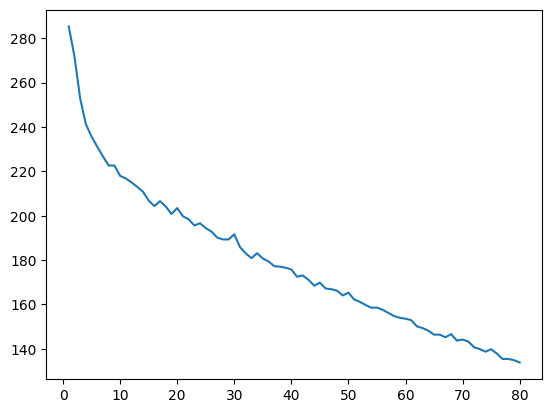

In [ ]:
topic_model.elbow_plot() # let's start with 15 clusters (probably will have to increase though)

You could make an argument for choosing something like 20 topics, but that is a ton (maybe it's not though, I'm assuming here) and I'd like to limit it to 15 or so.  UPDATE: I WAS WRONG, WE NEED MORE TOPICS, JUST NOT SURE HOW MANY :(

Create final model and evaluate it

In [ ]:
topic_model.create_topics(num_topics = 13) # tried everything from 12-24, it's proving difficult because of the breadth of responses

In [ ]:
topic_model.topics_df.query("topic == 12")

,topic,topic_keywords,sentiment
"i would sure like to be able to buy a park pass online and see the details of my pass (vehicle info, expirations, etc.)",12,"licenses,license,license.",-0.985335
discounted rate for annual pass or lifetime tpwd pass for us veterans.,12,"licenses,license,license.",-0.968648
"yes, i do, i think the tpwd should have classes on how to go about registering, rules and using texas public land. i would pay a fee to just learn on how to do it and do it right.",12,"licenses,license,license.",-0.993260
"buying fishing license was confusing, ended up buying permits that werent needed",12,"licenses,license,license.",-0.997457
just used the web site to re-register my boat,12,"licenses,license,license.",-0.999681
turn watercraft registration over to county tax offices. your registration folks are clueless and not helpful at all. usually takes several trips with new requests for documents on each visit.,12,"licenses,license,license.",-0.999728
print and make available the guides that you used to get when you get a license. not everyone has a computer and the information is very useful in the field or on the water.,12,"licenses,license,license.",-0.994436
wish yall bring back texas annual hunting and fishing books back when you buy your new license,12,"licenses,license,license.",-0.991805
way to many tickets for very minor infraction.,12,"licenses,license,license.",-0.981418
paid for boat trailer renewal sticker in october 2023. called in february looking for it. it is said to have been mailed out in february 2024. still havent received it. was told nothing can be done until 30 days after it was mailed. i would have to pay $22 for a replacement even though i didnt lose it. meanwhile we are grounded until tpwl. gets us a sticker. some of the questions by tpwl about the situation were inappropriate and lacked common sense.,12,"licenses,license,license.",-0.999538


The sentiment results are quite frankly, weird. Was hoping to average the sentiment scores for topic clusters but I'm not sure I trust the outputs here.  In that case, can use the ROBERTA model results for each result

In [ ]:
# topic_model.topics_keywords

AttributeError: 'ReviewsTopicModel' object has no attribute 'topics_keywords'

In [ ]:
df_topics = topic_model.topics_df

EXPORT THE DF_TOPICS DATAFRAME.  ISSUE W/ SUGGESTIONS_DF NOT INCLUDING ALL 326 ROWS OF COMMENTS...NOT SURE WHY.  
Work around: export the df_topics along w/ suggestions_df (including only rows w/ OPEN ENDED SUGGESTIONS not null so it matches)

In [ ]:
# export the df_topics
df_topics.to_excel('/content/drive/MyDrive/Colab Notebooks/NLP_projects/df_topics_16_topics.xlsx')

In [ ]:
# export a dataframe that only contains the rows w/ open ended suggestions NOT NULL
open_ended_df = df
open_ended_df.dropna(subset=["OPEN ENDED SUGGESTIONS"], inplace=True)
open_ended_df.shape

In [ ]:
# EXPORT open_ended_df
open_ended_df.to_excel('/content/drive/MyDrive/Colab Notebooks/NLP_projects/open_ended_df.xlsx')

In [ ]:
# suggestions_df.head(5)

In [ ]:
df_topics

In [ ]:
# reset index
df_topics = df_topics.reset_index()
df_topics = df_topics.rename(columns={"index": 'comment'})
df_topics

SAVING CURRENT TOPICS_DF REAL QUICK BEFORE STEPPING OUT, ASDFKALS;DJFLA;SKDJF UGHHH

In [ ]:
# df_topics.to_excel('/content/drive/MyDrive/Colab Notebooks/NLP_projects/28_topics_customer_satisfaction_export.xlsx')

create copy of original dataframe that doesn't include NaNs

In [ ]:
suggestions_df = df
suggestions_df.dropna(subset=["OPEN ENDED SUGGESTIONS"], inplace=True)
suggestions_df.shape

In [ ]:
df_topics.shape

add the three columns from DF_TOPICS to SUGGESTIONS_DF (rows match, already checked)

In [ ]:
suggestions_df['user_comment'] = df_topics['comment']
suggestions_df['topic_number'] = df_topics['topic']
suggestions_df['keywords'] = df_topics['topic_keywords']

In [ ]:
suggestions_df.head(3)

In [ ]:
suggestions_df

In [ ]:
suggestions_df.to_excel('/content/drive/MyDrive/Colab Notebooks/NLP_projects/suggestions_df_single_keyword.xlsx')

In [ ]:
# suggestions_df['topic_number'].value_counts()

In [ ]:
# join_df = suggestions_df.merge(df, on = 'USER_ID', how='left')
# join_df

df['user_comment'] = ''
df['topic_number'] = np.nan
df['keywords'] = ''

df.head(1)

In [ ]:
# df_empty = df.loc[df['OPEN ENDED SUGGESTIONS'].isnull()]

In [ ]:
# df_concat = pd.concat([df_empty, suggestions_df])
# df_concat

In [ ]:
suggestions_df

In [ ]:
df_concat.topic_number.value_counts()

SAVE THE NEW DATAFRAME

In [ ]:
# topic_model.topics_df["topic"].value_counts()

SCRAP BELOW!

For whatever reason, the bottom two classes were throwing errors, keeping them here in case I need them later

In [ ]:
# class ReviewsTopicModel:
# ### TESTING OUT SOME CHANGES TO THE STRING_MAP IN THIS CELL, BE AWARE OF THAT!!!!!!!!!!
#     STOPWORDS = stopwords.words('english') # stopwords from ntlk,  using in the method for topic centroid naming

#     EMBEDDING_DIM = 512 # USE encoder

#     # Constructor
#     def __init__(self, reviews):
#         self.X = self.clean(reviews)

#     # Clean text method
#     def clean(self, reviews):
#         # Words to replace based on cluster testing
#         string_map = {'\r': '', '\n': '', '/': ' ', "'": "", '"': '', "parks" : 'park', "parkland" : "park",
#                       'campsites': 'campsite', 'reservations' : 'reservation', 'nope': 'none'}
#         reviews_cleaned = reviews[:]
#         for i in range(len(reviews_cleaned)):
#             for s in string_map:
#                 reviews_cleaned[i] = reviews_cleaned[i].replace(s, string_map[s]).lower()
#         # Transform the reviews into embeddings dataframe
#         X = embed(reviews_cleaned)
#         X = pd.DataFrame(X)
#         X.index = reviews_cleaned
#         return X

#     # Method to determine number of topics (a.k.a kmeans cluster number)
#     def elbow_plot(self):
#         cluster_sizes = list(range(1, 81)) # a high end range value paints a clear picture
#         cluster_scores = []
#         for n in cluster_sizes:
#             kmeans = KMeans(n_clusters=n)
#             kmeans.fit(self.X)
#             cluster_scores.append(kmeans.inertia_)
#         plt.figure()
#         plt.plot(cluster_sizes, cluster_scores)
#         plt.show()

#     # Method to extract topics from text data
#     def create_topics(self, num_topics):
#         # Cluster the reviews
#         kmeans = KMeans(n_clusters=num_topics)
#         kmeans.fit(self.X)

#         # Create the final topics dataframe
#         topics_df = self.X.copy()
#         topics_df['topic'] = kmeans.labels_.copy()
#         topics_df['topic'] = topics_df['topic'].astype(int)

#         # Create summary keywords per topic
#         topic_keywords = {}
#         for topic in topics_df['topic'].unique():
#             topic_reviews = topics_df.query("topic == {}".format(topic)).index.tolist()
#             topic_centroid = kmeans.cluster_centers_[topic] # cluster center
#             topic_keywords[topic] = self.get_closest_words(topic_reviews, topic_centroid)
#         topics_df['topic_keywords'] = topics_df['topic'].map(topic_keywords)

#         # Score the sentiment of each review
#         topics_df['sentiment'] = [sentiment(r) for r in topics_df.index.values.tolist()]

#         # Final result
#         self.topics_keywords = topic_keywords
#         self.topics_df = topics_df.copy()[['topic', 'topic_keywords', 'sentiment']]


#     def get_closest_words(self, reviews, centroid):
#         word_distances = {}
#         for r in reviews:
#             review_words = [w for w in word_tokenize(r) if(w not in self.STOPWORDS)]
#             for w in review_words:
#                 word_embedding = embed([w]) # return 512 dimensional vector for the word 'w'
#                 # how similar is the word embedding to the topic's centroid (avg of the cluster sample's embeddings)
#                 word_distances[w] = self.cosine_similarity(word_embedding, centroid) # 1 it means match, closer to 0 means different
#         # done collecting the distances of the words to the topic's center
#         top_5_keywords = sorted([(word_distances[w], w) for w in word_distances])[-1:] # first elements will have smaller distances based on cosine similarity | TOP WORDS CLOSER TO 1 (W/ -1:)
#         return ",".join([x[1] for x in top_5_keywords])

#     def cosine_similarity(self, x, y): # arbitrary vectors
#         # x,y are both the appropriate dimension
#         x = x.reshape(self.EMBEDDING_DIM,)
#         y = y.reshape(self.EMBEDDING_DIM,)
#         # calculate cosine similarity
#         dotproduct = x.dot(y)
#         x_mag = x.dot(x)**0.5
#         y_mag = y.dot(y)**0.5
#         # returns closer to 1 if x and y are similar, closer to 0 if they are different
#         return dotproduct/(x_mag * y_mag)

In [ ]:
# class ReviewsTopicModel:
# ### TESTING OUT SOME CHANGES TO THE STRING_MAP IN THIS CELL, BE AWARE OF THAT!!!!!!!!!!
#     STOPWORDS = stopwords.words('english') # stopwords from nltk,  using in the method for topic centroid naming

#     EMBEDDING_DIM = 512 # USE encoder

#     # Constructor
#     def __init__(self, reviews):
#         self.X = self.clean(reviews)

#     # Clean text method
#     def clean(self, reviews):
#         # Words to replace based on cluster testing
#         string_map = {'\r': '', '\n': '', '/': ' ', "'": "", '"': '', "parks" : 'park', "parkland" : "park",
#                       'campsites': 'campsite', 'reservations' : 'reservation', 'nope': 'none'}
#         reviews_cleaned = reviews[:]
#         for i in range(len(reviews_cleaned)):
#             for s in string_map:
#                 reviews_cleaned[i] = reviews_cleaned[i].replace(s, string_map[s]).lower()
#         # Transform the reviews into embeddings dataframe
#         X = embed(reviews_cleaned)
#         X = pd.DataFrame(X)
#         X.index = reviews_cleaned
#         return X

#     # Method to determine number of topics (a.k.a kmeans cluster number)
#     def elbow_plot(self):
#         cluster_sizes = list(range(1, 81)) # a high end range value paints a clear picture
#         cluster_scores = []
#         for n in cluster_sizes:
#             kmeans = KMeans(n_clusters=n)
#             kmeans.fit(self.X)
#             cluster_scores.append(kmeans.inertia_)
#         plt.figure()
#         plt.plot(cluster_sizes, cluster_scores)
#         plt.show()

#     # Method to extract topics from text data
#     def create_topics(self, num_topics):
#         # Cluster the reviews
#         kmeans = KMeans(n_clusters=num_topics) # cluster values are the number of topics
#         kmeans.fit(self.X)

#     def get_closest_words(self, reviews, centroid): # tie the closest reviews to their centroid
#         word_distances = {}
#         for r in reviews:
#             review_words = [w for w in word_tokenize(r) if(w not in self.STOPWORDS)]
#             for w in review_words:
#                 word_embedding = embed([w]) # return 512 dimensional vector for the word, AKA 'w'
#                 # how similar is the word embedding to the topic's centroid (avg of the cluster sample's embeddings)
#                 word_distances[w] = self.cosine_similarity(word_embedding, centroid) # 1 it means match, closer to 0 means different
#         # done collecting the distances of the words to the topic's center
#         top_5_keywords = sorted([(word_distances[w], w) for w in word_distances])[-1:] # first elements will have smaller distances based on cosine similarity | TOP WORDS CLOSER TO 1 (W/ -1:)
#         return ",".join([x[1] for x in top_5_keywords])

#     def cosine_similarity(self, x, y): # x and y are arbitrary vectors
#         # x,y are both the appropriate dimension
#         x = x.reshape(self.EMBEDDING_DIM,)
#         y = y.reshape(self.EMBEDDING_DIM,)
#         # calculate cosine similarity
#         dotproduct = x.dot(y)
#         x_mag = x.dot(x)**0.5
#         y_mag = y.dot(y)**0.5
#         # returns closer to 1 if x and y are similar, closer to 0 if they are different
#         return dotproduct/(x_mag * y_mag)

# # ////////////////////////////////////////////////////////////////////////////////////////

#         # Create the final topics dataframe
#         topics_df = self.X.copy()
#         topics_df['topic'] = kmeans.labels_.copy()
#         topics_df['topic'] = topics_df['topic'].astype(int)

#         # Create summary keywords per topic
#         topic_keywords = {}
#         for topic in topics_df['topic'].unique():
#             topic_reviews = topics_df.query("topic == {}".format(topic)).index.tolist()
#             topic_centroid = kmeans.cluster_centers_[topic] # cluster center
#             topic_keywords[topic] = self.get_closest_words(topic_reviews, topic_centroid)
#         topics_df['topic_keywords'] = topics_df['topic'].map(topic_keywords)

#         # Score the sentiment of each review
#         topics_df['sentiment'] = [sentiment(r) for r in topics_df.index.values.tolist()]

#         # Final result
#         self.topics_keywords = topic_keywords
#         self.topics_df = topics_df.copy()[['topic', 'topic_keywords', 'sentiment']]